In [110]:
import pymolzilla.processing as pm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

In [38]:
f = pm.cofe_room_t()
f.load()
f.preprocess()
f.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
loading set: 9
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
preprocessing set: 9
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
processing set: 9


In [39]:
f.analyze()

analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
analyzing set: 9
postprocessing


In [67]:
k_id = f[6].fit_anisotropy.free_energy.k

print(f[6].fit_anisotropy.obj([0,0,0,0]))
print(f[6].fit_anisotropy.obj([2.6,-3.1,-3.9,0.9]))
print(f[6].fit_anisotropy.free_energy.k)

#0.05616265858430715
#0.00016336725460932067
#{2: (2.6469526611940917-3.176365204098649j), 4: (-3.907011661776603+0.9105599146248565j)}

0.05616265858430715
0.00016336725460932067
{2: (2.6469526611940917-3.176365204098649j), 4: (-3.907011661776603+0.9105599146248565j)}


In [135]:
ell = patches.Ellipse((k_id[2].real, k_id[2].imag),1,1)

In [157]:
ext_x=[-5,5]
ext_y=[-5,5]

x = np.linspace(*ext_x,20)
y = np.linspace(*ext_y,20)
xx, yy = np.meshgrid(x, y)

In [158]:
def g(x,y,num):
    return np.sqrt(f[num].fit_anisotropy.obj([x,y,k_id[4].real,k_id[4].imag]))

def factory(num):
    def gg(x,y):
        return g(x,y,num)
    return gg

def plot(num):
    zz = np.vectorize(factory(num))(xx,yy)
    plt.figure()
    ax = plt.gca()
    ell = patches.Ellipse((k_id[2].real, k_id[2].imag),1,1, facecolor=None, edgecolor='r')
    ax.imshow(zz,norm=colors.LogNorm(vmin=zz.min(),vmax=zz.max()), extent=ext_x+ext_y, origin='lower')
    ax.add_patch(ell)

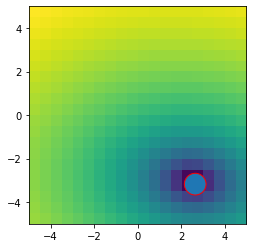

In [159]:
plot(6)

In [98]:
f[6].fit_anisotropy.results

                        fun: 0.00015581777277453353
 lowest_optimization_result:       fun: 0.00015581777277453353
 hess_inv: array([[4.23771543e+02, 1.22284885e+02, 6.09317143e+01, 8.70558305e+01],
       [1.22284885e+02, 7.94611445e+01, 1.37409075e-01, 3.54436884e+01],
       [6.09317143e+01, 1.37409075e-01, 1.08613961e+02, 3.00652556e+01],
       [8.70558305e+01, 3.54436884e+01, 3.00652556e+01, 8.98646348e+01]])
      jac: array([-7.31199179e-06,  1.78620758e-06,  5.81923450e-06, -6.30894101e-06])
  message: 'Optimization terminated successfully.'
     nfev: 215
      nit: 33
     njev: 43
   status: 0
  success: True
        x: array([ 2.64695266, -3.1763652 , -3.90701166,  0.91055991])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 1
                       nfev: 1122
                        nit: 3
                       njev: 222
                    success: True
                          x: array([ 

In [109]:
hess = np.array([[4.23771543e+02, 1.22284885e+02, 6.09317143e+01, 8.70558305e+01],
       [1.22284885e+02, 7.94611445e+01, 1.37409075e-01, 3.54436884e+01],
       [6.09317143e+01, 1.37409075e-01, 1.08613961e+02, 3.00652556e+01],
       [8.70558305e+01, 3.54436884e+01, 3.00652556e+01, 8.98646348e+01]])

In [152]:
zz = np.vectorize(lambda x,y: (x-1)**2+(y-2)**2)(xx,yy)

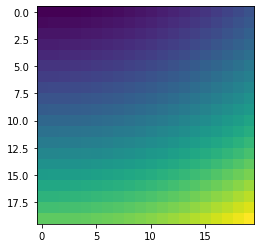

In [153]:
plt.imshow(zz)